In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud_check (1).csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
max(df['Taxable.Income'])

99619

In [5]:
df['Taxable.Income'] = pd.cut(x=df['Taxable.Income'], bins=[1, 30000, 99619], labels=['Risky', 'Good'], right=False)

In [7]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO
599,NO,Divorced,Good,158137,16,NO


In [ ]:
df['Taxable.Income'] = pd.cut(x=df['Taxable.Income'], bins=[1, 10, 20], labels=['Lows', 'Highs'], right=False)

In [8]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     599 non-null category
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: category(1), int64(2), object(3)
memory usage: 24.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lbe = LabelEncoder()

In [14]:
df["Undergrad"] = lbe.fit_transform(df["Undergrad"])
df["Marital.Status"] = lbe.fit_transform(df["Marital.Status"])
df["Urban"] = lbe.fit_transform(df["Urban"])

In [15]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1


In [19]:
X = df.drop(['Taxable.Income'],axis = 1)
X.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1


In [26]:
X.isnull().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [16]:
Y = df.iloc[:,2]
Y.head(2)

0    Good
1    Good
Name: Taxable.Income, dtype: category
Categories (2, object): [Risky < Good]

In [ ]:
Y.isnull

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=123)
Y_train.head(2)

442    Good
43     Good
Name: Taxable.Income, dtype: category
Categories (2, object): [Risky < Good]

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(n_estimators=3)

In [25]:
model.fit(X_train,Y_train)

ValueError: Input contains NaN

In [19]:
scores = model.score(X_test,Y_test)
scores

0.0

In [20]:
Y_predictions = model.predict(X_test)
Y_predictions 

array([12011, 31409, 18032, 44034, 36156, 38670, 10003, 10348, 24557,
       15673, 31458, 27684, 84557, 75170, 74010, 14310, 76535, 87348,
       23855, 29916, 42063, 16992, 51685, 47565, 55308, 97703, 46610,
       31591, 73906, 91304, 46939, 52022, 33962, 96355, 48825, 84263,
       12470, 33614, 94247, 73188, 38586, 92070, 64667, 91684, 83061,
       52022, 58751, 44947, 37857, 10150, 70339, 85972, 70365, 79616,
       86531, 14398, 77367, 97493, 11865, 26793, 80239, 31521, 70812,
       77511, 59419, 33614, 36156, 26094, 23855, 27698, 21966, 60789,
       26494, 82625, 48825, 46470, 39114, 21966, 74010, 33810, 74971,
       14326, 74010, 10735, 32434, 39818, 86531, 69224, 68404, 21966,
       31521, 48640, 20851, 70819, 38374, 61445, 17962, 97453, 71572,
       58751, 20391, 34655, 20309, 58496, 90910, 17440, 26494, 59351,
       62365, 51913, 15853, 78867, 10870, 16082, 31591, 36890, 77634,
       59351, 50403, 15673], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predictions)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

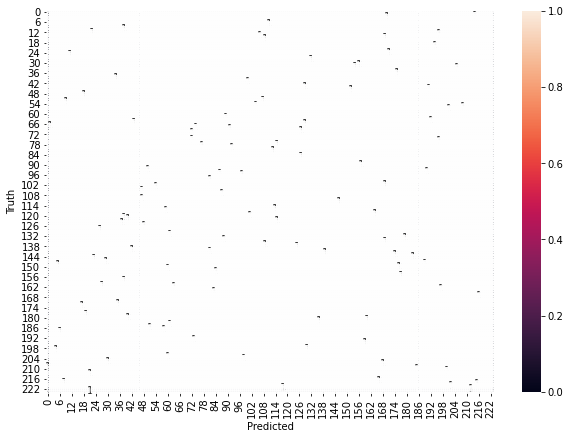

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')